In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy import save
from numpy import load
from PIL import Image

# **Data loading**

In [2]:
file=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Assignment4Dataset.csv")
file.columns=['f1','f2','label']
file.head(5)
data=file[['f1','f2']]
data['f3']=data['f1']*data['f2']
label=file[['label']]
data.head()
print(label.shape)

(5299, 1)


# **features adding**

In [3]:
data['f4'] = data['f1']**2
data['f5'] = data['f2']**2
data['f6'] = data['f1'] * data['f2']
data['f7'] = data['f1'] * data['f1']
data['f8'] = data['f2'] * data['f2']
data['f9'] = (data['f1'] * data['f2'] + 1)**2
data['f10'] = np.exp(-0.3*(data['f1'] - data['f2'])**2)

**Data fetching** and distributing

In [4]:

x_train=data[0:400]
y_train=label[0:400]

x_test=data[400:]
y_test=label[400:]
print (f"X_train: {x_train.shape}, y_train: {y_train.shape}")

print (f"X_test: {x_test.shape}, y_test: {y_test.shape}")



X_train: (400, 10), y_train: (400, 1)
X_test: (4899, 10), y_test: (4899, 1)


# **main code**


In [28]:
#batch size selection
batch=1
itr=0
m=len(y_train)
alpha=1e-2
lembda=0.8
w=np.random.randn(10,1)
wlist=[]
losslist=[]
itrlist=[]

x_train_copy=x_train.copy()

x_train_copy["label"]=y_train

while(itr!=1000):
   
#taking starting k element from shuffled data(k=batch size)
  x_train_shuffle=x_train_copy.sample(frac=1)

  x_train_new=x_train_shuffle.iloc[0:batch,:]
  y_train_new=x_train_new.iloc[:,10:11]
  x_train_new=x_train_new.iloc[:,0:10]
  
  y_pred_new=np.dot(x_train_new,w)
    
 
#calculating gradient wrt w  for starting k data points  
  gw=(-1/m)*np.dot(x_train_new.transpose(),(y_train_new-y_pred_new))+lembda*w
#loss is calculated wrt to all data point thats why we use x_train not x_train_new  
  y_pred=np.dot(x_train,w)
  loss=(1/(2*m))*np.dot((y_train-y_pred).transpose(),(y_train-y_pred))+lembda*(np.dot(w.transpose(),w))/2  
#printing
  if itr==0:
    print(f"itr:{itr}, loss{loss}")
  if itr==999:
    print(f"itr:{itr}, loss{loss}")   
#update w for new iteration
  w=w-alpha*gw
#storing values of each iteration in list 
  wlist.append(w)
  itrlist.append(itr)
  losslist.append(loss[0][0])
  itr=itr+1
  
#final weights
print(w)

itr:0, loss[[10.69728451]]
itr:999, loss[[0.49944384]]
[[ 5.15607405e-04]
 [ 6.51099266e-04]
 [-4.48657302e-05]
 [ 2.07956071e-05]
 [-5.66786093e-04]
 [ 3.71930696e-04]
 [-9.24067190e-05]
 [-7.67449604e-04]
 [ 6.31714299e-04]
 [-2.58919298e-04]]


In [29]:
#final pridictions of train and test data
pred_train=np.dot(x_train,w)
pred_test =np.dot(x_test,w) 
print(pred_train.shape,pred_test.shape)

(400, 1) (4899, 1)


calculating final Mean square error 

In [30]:
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse} test_MSE: {test_mse}")

train_MSE: label    0.998919
dtype: float64 test_MSE: label    0.998863
dtype: float64


**Accuracy**

training accuracy

In [31]:
pred = np.dot(x_test, w)
sum=0
for i in range(len(pred)):
  if ((pred[i][0]*y_test.iloc[i][0]) >= 0):
    sum+=1
  

accuracy = sum/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 62.094304960195956


testing accuracy

In [32]:
pred = np.dot(x_train, w)
sum=0
for i in range(len(pred)):
  if ((pred[i][0]*y_train.iloc[i][0]) >= 0):
    sum+=1
  

accuracy = sum/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 64.0


**ploting**

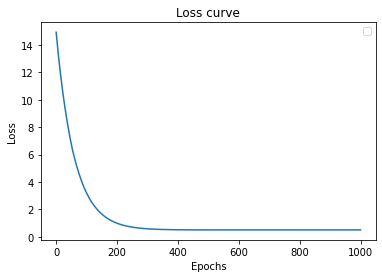

In [59]:
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")



plt.plot(itrlist, losslist)
plt.legend()
plt.show()


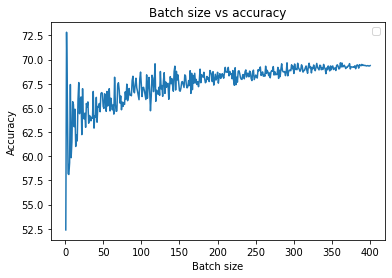

**Code to plot graph of batch size vs accuracy**

In [ ]:
"""
batch_size=[]
accuracy=[]
for i in range (1,3):
  batch=i
  print(i)
  batch_size.append(i)
  itr=0
  m=len(y_train)
  alpha=1e-2
  lembda=0.8
  w=np.random.randn(10,1)
  wlist=[]
  losslist=[]
  itrlist=[]

  x_train_copy=x_train.copy()

  x_train_copy["label"]=y_train

  while(itr!=1000):
    
    
    x_train_shuffle=x_train_copy.sample(frac=1)

    x_train_new=x_train_shuffle.iloc[0:batch,:]
    y_train_new=x_train_new.iloc[:,10:11]
    x_train_new=x_train_new.iloc[:,0:10]
    
    y_pred_new=np.dot(x_train_new,w)
      
  
    #calculating gradient wrt w  for that point  
    gw=(-1/m)*np.dot(x_train_new.transpose(),(y_train_new-y_pred_new))+lembda*w
    y_pred=np.dot(x_train,w)
    loss=(1/(2*m))*np.dot((y_train-y_pred).transpose(),(y_train-y_pred))+lembda*(np.dot(w.transpose(),w))/2  
    if itr==0:
      print(f"itr:{itr}, loss{loss}")
    if itr==999:
      print(f"itr:{itr}, loss{loss}")   
    w=w-alpha*gw
    wlist.append(w)
    itrlist.append(itr)
    losslist.append(loss[0][0])
    itr=itr+1
  pred_train=np.dot(x_train,w)
  pred_test =np.dot(x_test,w) 
  
  pred = np.dot(x_test, w)
  sum=0
  for i in range(len(pred)):
    if ((pred[i][0]*y_test.iloc[i][0]) >= 0):
      sum+=1
    

  accuracy.append( (sum/len(pred))*100)
  
"""

In [39]:
#save('/content/drive/MyDrive/Colab Notebooks/ml/accuracy_minibatch.npy', accuracy)
#save('/content/drive/MyDrive/Colab Notebooks/ml/batch_size_minibatch.npy', batch_size)

In [51]:
#accuracy=load('/content/drive/MyDrive/Colab Notebooks/ml/accuracy_minibatch.npy')
#batch_size=load('/content/drive/MyDrive/Colab Notebooks/ml/batch_size_minibatch.npy')

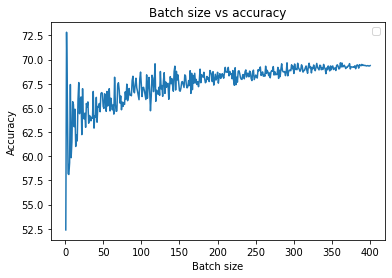

In [52]:



"""
plt.title("Batch size vs accuracy")
plt.xlabel("Batch size")
plt.ylabel("Accuracy")



plt.plot(batch_size, accuracy)
plt.legend()
plt.show()
"""